In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# DATA PREPROCESSING

In [2]:
dataset1 = pd.read_csv('ML Data sets/titanic_train.csv')
dataset2 = pd.read_csv('ML Data sets/titanic_test.csv')

In [3]:
dataset1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
dataset1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

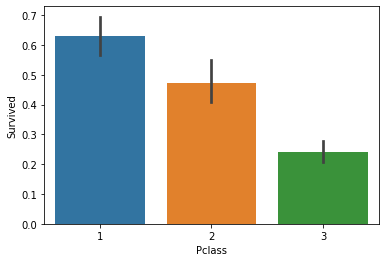

In [7]:
sns.barplot(x = 'Pclass', y = 'Survived', data = dataset1)

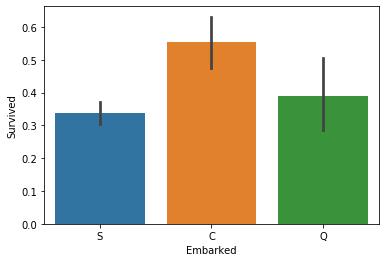

In [8]:
sns.barplot(x = 'Embarked', y = 'Survived', data=dataset1)

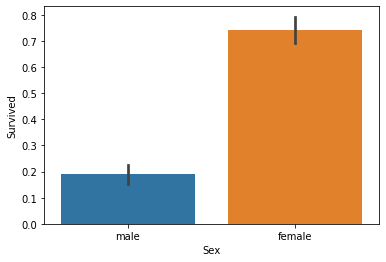

In [9]:
sns.barplot(x = 'Sex', y = 'Survived' , data = dataset1)

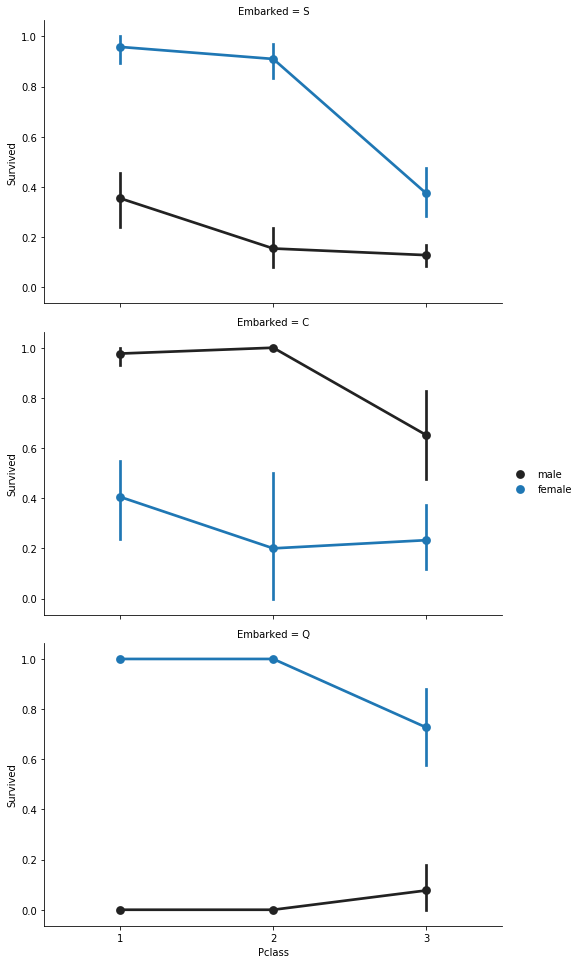

In [10]:
FacetGrid = sns.FacetGrid(dataset1, row = 'Embarked', height = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None).add_legend()

In [11]:
data = [dataset1, dataset2]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
dataset1['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Aadhi\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


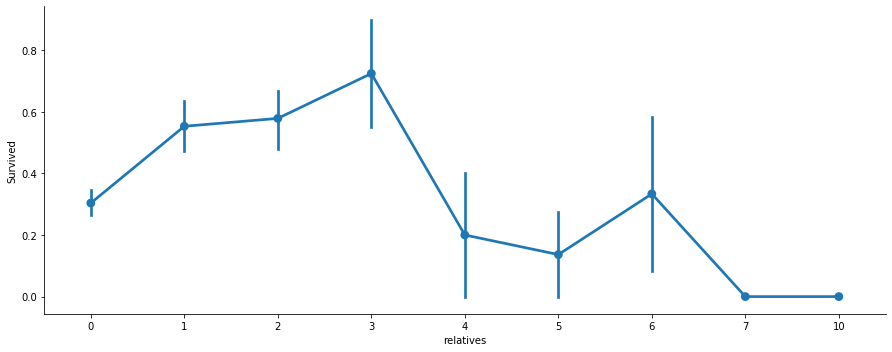

In [12]:
axes = sns.factorplot('relatives','Survived', 
                      data=dataset1, aspect = 2.5, )

In [13]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [dataset1, dataset2]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

dataset1 = dataset1.drop(['Cabin'], axis=1)
dataset2 = dataset2.drop(['Cabin'], axis=1)

In [14]:
dataset['Deck']

0      8
1      8
2      8
3      8
4      8
      ..
413    8
414    3
415    8
416    8
417    8
Name: Deck, Length: 418, dtype: int32

In [15]:
data = [dataset1, dataset2]

for dataset in data:
    mean = dataset1["Age"].mean()
    std = dataset2["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset1["Age"].astype(int)
dataset1["Age"].isnull().sum()

0

In [16]:
data = [dataset1, dataset2]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [17]:
dataset1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
data = [dataset1, dataset2]

for dataset in data:
    dataset1['Fare'] = dataset1['Fare'].fillna(0)
    dataset1['Fare'] = dataset1['Fare'].astype(int)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  relatives    418 non-null    int64  
 11  not_alone    418 non-null    int32  
 12  Deck         418 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 37.7+ KB


In [21]:
data = [dataset1, dataset2]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [22]:
dataset1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,71,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,53,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8,S,0,1,8
5,6,0,3,"Moran, Mr. James",male,5,0,0,330877,8,Q,0,1,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,6,0,0,17463,51,S,0,1,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,21,S,4,0,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3,0,2,347742,11,S,2,0,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,1,0,237736,30,C,1,0,8


In [24]:
dataset1 = dataset1.drop(['PassengerId'], axis=1)

In [25]:
dataset1 = dataset1.drop(['Ticket'], axis=1)

In [26]:
dataset1 = dataset1.drop(['Name'], axis=1)

In [27]:
dataset1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,male,2,1,0,7,S,1,0,8
1,1,1,female,5,1,0,71,C,1,0,3
2,1,3,female,3,0,0,7,S,0,1,8
3,1,1,female,5,1,0,53,S,1,0,3
4,0,3,male,5,0,0,8,S,0,1,8
5,0,3,male,5,0,0,8,Q,0,1,8
6,0,1,male,6,0,0,51,S,0,1,5
7,0,3,male,0,3,1,21,S,4,0,8
8,1,3,female,3,0,2,11,S,2,0,8
9,1,2,female,1,1,0,30,C,1,0,8


In [28]:
temp = {"S":0,"C":1,"Q":2}
data = [dataset1, dataset2]
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(temp)

In [29]:
dataset1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,male,2,1,0,7,0,1,0,8
1,1,1,female,5,1,0,71,1,1,0,3
2,1,3,female,3,0,0,7,0,0,1,8
3,1,1,female,5,1,0,53,0,1,0,3
4,0,3,male,5,0,0,8,0,0,1,8


In [30]:
temp1 = {"male":0,"female":1}
data = [dataset1,dataset2]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(temp1)

In [31]:
dataset1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,0,2,1,0,7,0,1,0,8
1,1,1,1,5,1,0,71,1,1,0,3
2,1,3,1,3,0,0,7,0,0,1,8
3,1,1,1,5,1,0,53,0,1,0,3
4,0,3,0,5,0,0,8,0,0,1,8


In [34]:
dataset1 = dataset1.drop(['Fare'],axis = 1)

# BUILDING A MODEL

In [41]:
x_train = dataset1.drop(['Survived'],axis = 1)
y_train = dataset1['Survived']
x_test = dataset2.drop(['PassengerId','Name','Fare','Ticket'],axis = 1).copy()

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
s_lr = round(lr.score(x_train,y_train)*100, 2)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)
s_knc = round(knc.score(x_train,y_train)*100, 2)

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
s_svc = round(svc.score(x_train,y_train)*100, 2)

In [55]:
from sklearn.svm import SVC
ksvc = SVC(kernel = 'rbf', random_state = 0)
ksvc.fit(x_train,y_train)
y_pred = ksvc.predict(x_test)
s_ksvc = round(ksvc.score(x_train,y_train)*100, 2)

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
s_gnb = round(gnb.score(x_train,y_train)*100, 2)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
s_dtc = round(dtc.score(x_train,y_train)*100, 2)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
s_rfc = round(rfc.score(x_train,y_train)*100, 2)

In [59]:
result = pd.DataFrame({'Model':['Logistic Regression','K-Nearest Neighbors','Support vector Classifier','Kernel Support vector Classifier','Naive Bayes Classifier','Decision Tree Classifier','Random Forest Classifier'],
                     'Score':[s_lr,s_knc,s_svc,s_ksvc,s_gnb,s_dtc,s_rfc]})
results = result.sort_values(by = 'Score', ascending = False)
results = results.set_index('Score')
results.head(8)

,Model
Score,
89.90,Decision Tree Classifier
89.45,Random Forest Classifier
83.50,K-Nearest Neighbors
80.81,Kernel Support vector Classifier
80.58,Logistic Regression
79.12,Support vector Classifier
78.34,Naive Bayes Classifier


In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 10)
print("Scores:",accuracies)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation : {:2f}%".format(accuracies.std()*100))

Scores: [0.75555556 0.76404494 0.75280899 0.79775281 0.84269663 0.82022472
 0.74157303 0.79775281 0.82022472 0.74157303]
Accuracy : 78.34%
Standard Deviation : 3.496419%


In [71]:
importance = pd.DataFrame({'feature':x_train.columns,'importance':np.round(dtc.feature_importances_, 3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')
importance.head(12)

,importance
feature,
Sex,0.337
Age,0.155
Pclass,0.134
Deck,0.134
relatives,0.116
SibSp,0.038
Embarked,0.038
Parch,0.026
not_alone,0.022


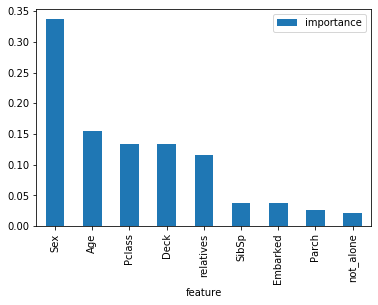

In [72]:
importance.plot.bar()

In [1]:
#78% ACCURACY.... CAN DO BETTER IF NOT DROPPING FARE COLUMN